In [1]:
%matplotlib inline

# Neural Networks and Learning Machines
## Exercise 5 - Convolutional ANN and Transfer learning

In [2]:
epochs = 30

# Introduction
The goal of this exercise is for you to get a better understanding of what convolution is, how it is leveraged to increase the usability and performance of neural networks. The exercise will also teach you about transfer learning and the differences between fine-tuning/feature extraction. 

## Literature
This exercise will rely on the following sections in the [course book](https://www.deeplearningbook.org/).

- Chapter 9
    - Most of it
- Chapter 7
    - Section 7.4 - Dataset augmentation
- Chapter 15
    - Section 15.2 - Transfer learning
    
## Examination
Epochs are predefined to be 30. Feel free to increase/decrease this number depending on the hardware that you are working with. Just make sure that you use the same hyperparameters on tasks 2, 3 and 4. **Make sure you have all examination requirements in order before presenting.**

### Task 1
1. Implementation of same convolution.
2. The resulting image using 3 different filters.

### Task 2
1. The given network trained, validated and tested on the given dataset. Don't forget to make the train/validation/test split of the dataset. This can be achieved programmatically using https://pytorch.org/docs/stable/data.html#torch.utils.data.random_split.
2. Some type of regularization should be used. You should understand how the chosen regularization technique works.
3. Report the training, validation and test accuracy. (Should beat randomly picking)
4. Calculate and plot the multi-class [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
5. Add some augmentation techniques which fits well with the data. Does this increase or decrease the validation accuracy?

### Task 3
1. Fine-tune Resnet18 on the given dataset.
2. Report the training, validation and test accuracy. (Should beat randomly picking)
3. Calculate and plot the multi-class [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
4. Add some augmentation techniques which fits well with the data. Does this increase or decrease the validation accuracy?

### Task 4
1. Use Resnet18 as a feature extractor on the dataset.
2. Report the training, validation and test accuracy. (Should beat randomly picking)
3. Calculate and plot the multi-class [confusion matrix](https://en.wikipedia.org/wiki/Confusion_matrix).
4. Add some augmentation techniques which fits well with the data. Does this increase or decrease the validation accuracy?

# Convolution in Neural Networks
A convolutional neural network, CNN for short, is a type of ANN that consists of at least one convolutional layer. CNN's are often used where the input size may vary such as when we are dealing with image input. The architecture of CNNs was inspired by how the visual cortex functions in our brain.

## Task 1: Implement convolution
Implement 2d same convolution without using a built-in convolution function. This should function as described in [this blog post](https://jcbgamboa.github.io/2017/08/12/what-are-convolutions/). One of the great strengths of convolution is that it functions on any sized image, hence it is important that your implementation also does. Same convolution means that the dimensions of the output are the same as the dimensions of the input. This is achieved by padding the input.

Once you have implemented a function that performs 2d convolution, use that to perform convolution over all channels in this image. Show the result using 3 different filters.

To find the padding needed to get the input to be the same space as the output you can use the formula:

$$ n_{out} = \left \lfloor\frac{n_{in}+2p-k}{s} \right \rfloor+1 $$

where $n_{out}$ is the number of output features, $n_{in}$ is the number of input features, $k$ is the kernel size, $p$ is the padding size and $s$ is the stride size. You can assume that the stride is always 1.

[[ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]
 [ True  True  True  True]]


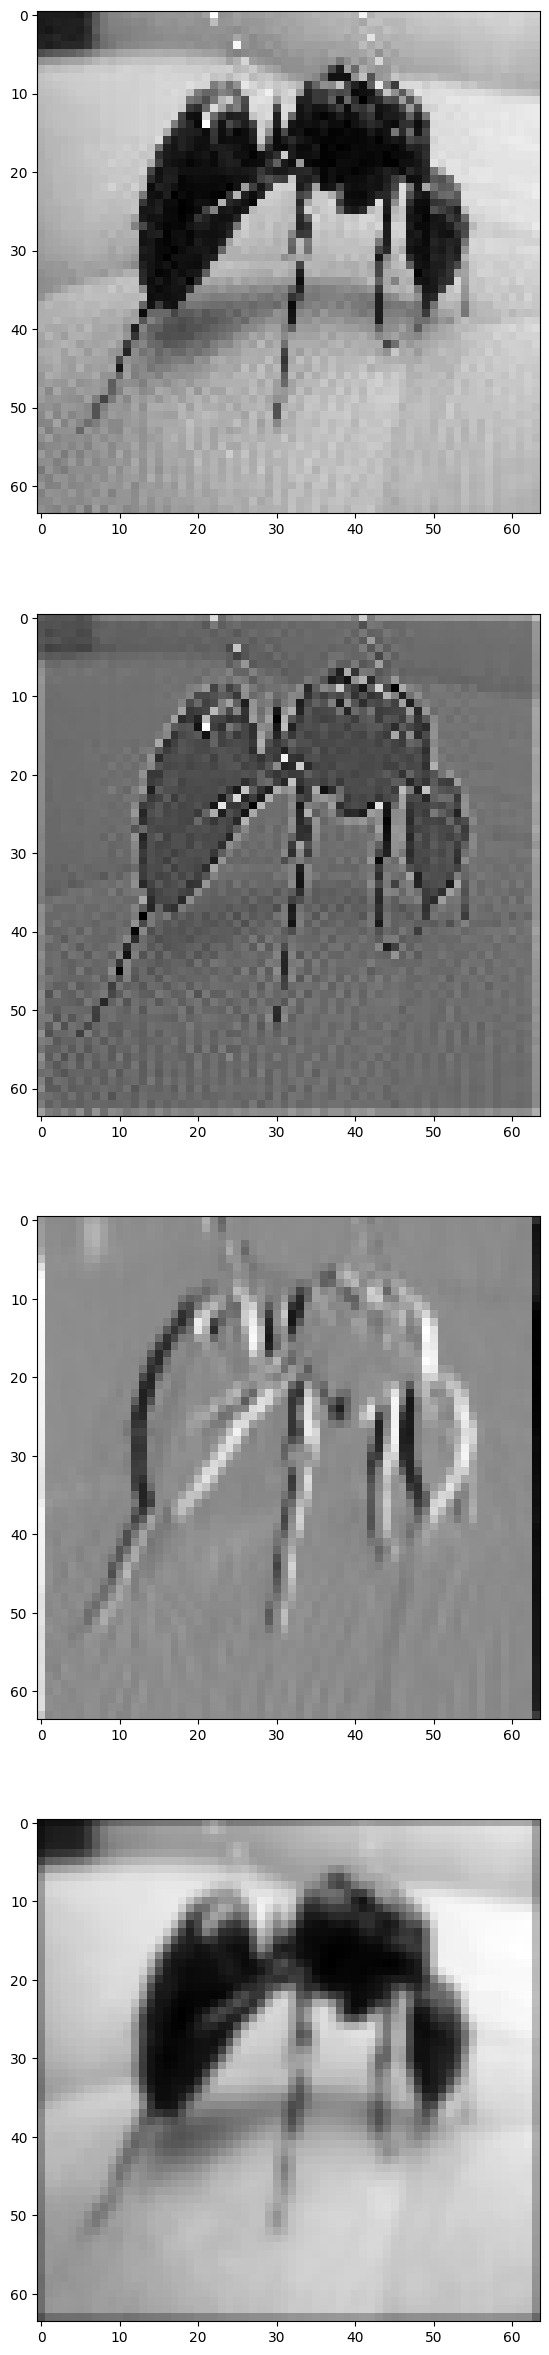

In [3]:
import numpy as np
import math
import cv2
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 30]
plt.rcParams['figure.dpi'] = 100

# Implement same convolution in the function below (kernel is a 2d numpy array an example of which can be found in the test)
def conv(image, kernel, strides=1):
    # Store image, kernel height and width
    image_height, image_width = image.shape  # Image dimensions
    # Kernel dimensions: height and widthd of kernel we're gonna use to iterate over the image
    kernel_height, kernel_width = kernel.shape 

    # Padding: add zeros to the borders for kernel centering + information conversation + convolution processes also in the bourders
    # Decide the size of padding
    # This is decided based on kernel size as the output is of the kernel size
    pad_height = math.floor((kernel_height - 1)/2)
    pad_width = math.floor((kernel_width - 1) / 2)
    #print(type(pad_height))

    # DO padding
    pad_image = np.pad(image,((pad_height, pad_height), (pad_width,pad_width)), mode='constant')  # It adds zeros to the borders of the image. 

    # initialise the output
    output = np.zeros((image_height, image_width))

    # Apply convolution
    for y in range(0,image_height):
        for x in range(0,image_width):
            area = pad_image[y:y + kernel_height, x:x + kernel_width]
            output[y,x] = np.sum(area * kernel)

    return output

# Our test, don't edit
inp = np.array([[1,1,1,1],[1,1,2,1],[1,-3,-4,1],[1,1,1,1]])
kernel = np.array([[0,1,0],[1,2,1],[0,1,0]]) # This is the second input of conv()

# If all are TRUE the convolution is implemented correctly
ans = np.array([[4, 5, 6, 4], [5, 3, 3, 6], [1, -7, -7, 0], [4, 1, 0, 4]])
print(conv(inp, kernel) == ans)

f, axarr = plt.subplots(4,1)

# How to load images using opencv
image_path = "/Users/sofiaplazzi/Desktop/Neural Networks & Learning Machines/ANN3/101_ObjectCategories_2classes/ant/image_0001.jpg"
image = cv2.imread(image_path)
image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY) # gray scale so we dont have to deal with more than 1 channel

# Define your 3 kernels
# The central value (5) represents the strength of the central pixel, and the surrounding values contribute to edge detection by detecting changes in intensity.
kernel_1 = np.array([[0,-1,0],[-1,5,-1],[0,-1,0]]) # Laplacian filter:  edge detection and enhancement
# Sobel filter: it calculates the gradient of the image intensity in the horizontal direction. It emphasizes horizontal edges in the image.
kernel_2 = np.array([[-1,0,1],[-2,0,2],[-1,0,1]])
# Blurry filter: reducing noise and removing small details from images while preserving larger structures
kernel_3 =  np.array([[1,2,1],[2,4,2],[1,2,1]])

# Perform the convolution (might take a couple of seconds depending on the implementation)
output1 = conv(image, kernel_1)
output2 = conv(image, kernel_2)
output3 = conv(image, kernel_3)

# plot the loaded image and the 3 convoluted images
axarr[0].imshow(image, cmap="gray")
axarr[1].imshow(output1, cmap="gray")
axarr[2].imshow(output2, cmap="gray")
axarr[3].imshow(output3, cmap="gray")

plt.show()

# Computer Vision
Computer vision (CV) is a task within the computer science field that aim is to extract high-level information from static images or video. Such high-level information can be, but is not limited to:
* Object detection - Detect and classify objects within input images
* Anomaly detection - Detect anomalies in the input images
* Semantic segmentation - Classify each pixel in the input image into different classes
* Object recognition - Classifying an entire image depending on what it contains

CV has been studied for multiple decades where early solutions used handwritten feature extractors to extract information from the input. However, with the increase of computing power together with the rise of deep learning algorithms, the main method used to solve CV problems is convolutional neural networks.

In this exercise, we will be taking a closer look at object recognition by first using a randomly initialized network and then utilizing transfer learning. **The dataset we will use for this exercise can be downloaded on canvas**. It is a subset of [this dataset](http://www.vision.caltech.edu/Image_Datasets/Caltech101/). Remember to split the data into separate training, validation and test set.

## Task 2: Implement the missing code and train it on the given dataset.
For task 2, implement the missing parts of the code below. The code should correctly train, validate and test the model. There are some comments guiding you through the process, however if something is unclear try to leverage the documentation for pytorch found [here](https://pytorch.org/docs/stable/index.html). You should also add some type of regularization into your model.

Remember to check the examination requirements in the start of this notebook.

TO DO: Add regularization

Epoch 1/30, Training Loss: 0.6951, Validation Loss: 0.6701
Epoch 2/30, Training Loss: 0.6234, Validation Loss: 0.5995
Epoch 3/30, Training Loss: 0.5458, Validation Loss: 0.5715
Epoch 4/30, Training Loss: 0.4534, Validation Loss: 0.5328
Epoch 5/30, Training Loss: 0.3603, Validation Loss: 0.5518
Epoch 6/30, Training Loss: 0.2824, Validation Loss: 0.5427
Epoch 7/30, Training Loss: 0.2222, Validation Loss: 0.6702
Epoch 8/30, Training Loss: 0.1720, Validation Loss: 0.6847
Epoch 9/30, Training Loss: 0.1308, Validation Loss: 0.7450
Epoch 10/30, Training Loss: 0.1020, Validation Loss: 0.9165
Epoch 11/30, Training Loss: 0.0830, Validation Loss: 0.8474
Epoch 12/30, Training Loss: 0.0612, Validation Loss: 1.0064
Epoch 13/30, Training Loss: 0.0415, Validation Loss: 1.0615
Epoch 14/30, Training Loss: 0.0293, Validation Loss: 1.0514
Epoch 15/30, Training Loss: 0.0235, Validation Loss: 1.1996
Epoch 16/30, Training Loss: 0.0149, Validation Loss: 1.3065
Epoch 17/30, Training Loss: 0.0117, Validation Lo

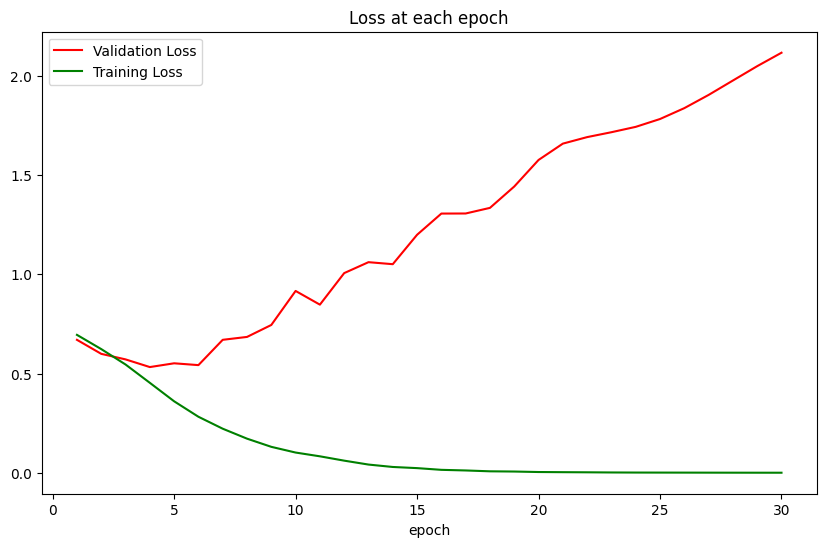

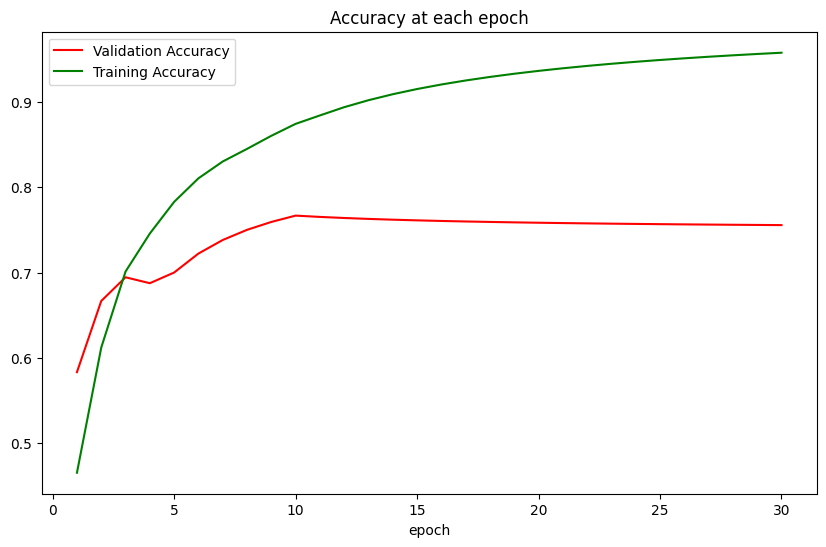

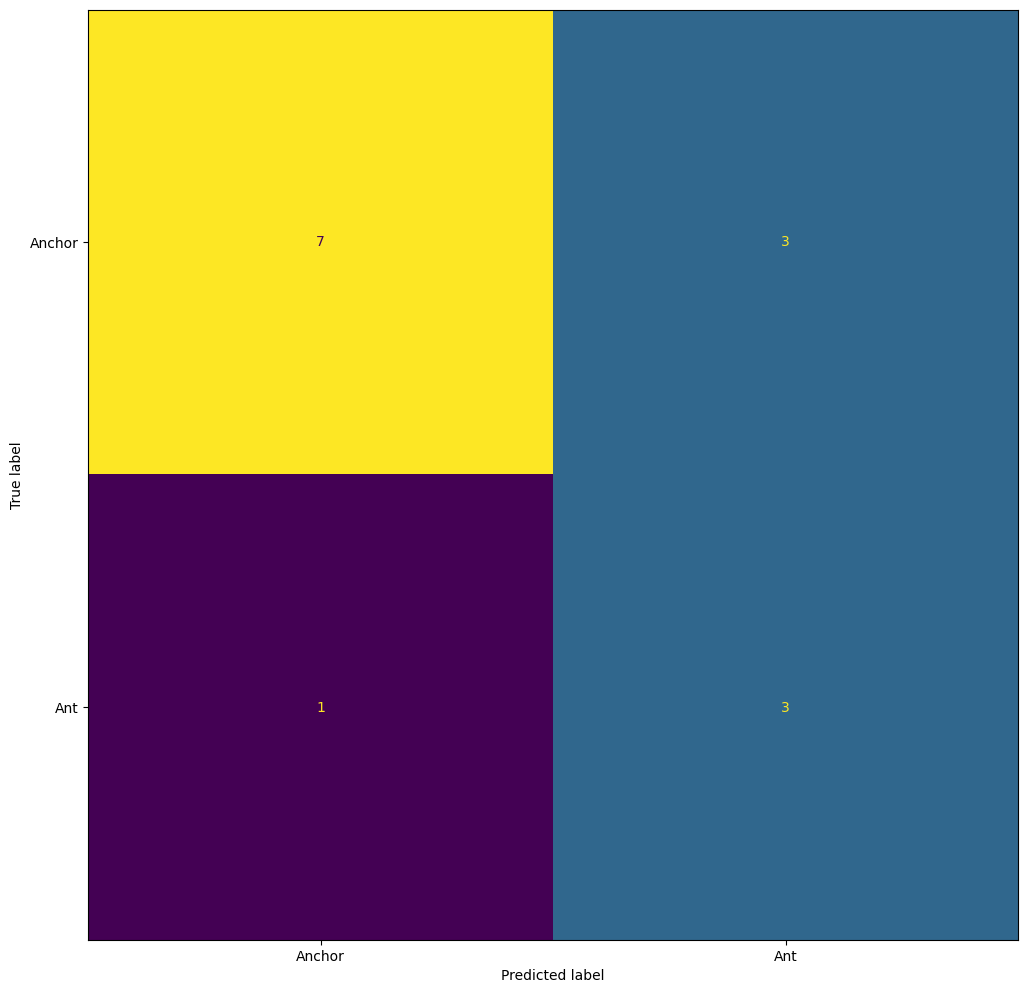

Test Accuracy 71.43% 


In [11]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from torchvision import transforms
import torchvision.models as models
from torchvision.datasets import ImageFolder
from torch.utils.data import DataLoader, random_split
from copy import deepcopy
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix

import matplotlib.pyplot as plt

class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(3, 6, 5)
        self.pool = nn.MaxPool2d(2, 2)
        self.conv2 = nn.Conv2d(6, 16, 5)
        self.fc1 = nn.Linear(16 * 13 * 13, 120)
        self.fc2 = nn.Linear(120, 2)

    def forward(self, x):
        # Implement the forward function in the network
        x = self.pool(F.relu(self.conv1(x)))  # First convolutional layer followed by ReLU activation and pooling
        x = self.pool(F.relu(self.conv2(x)))  # Second convolutional layer followed by ReLU activation and pooling
        x = torch.flatten(x, 1)  # Reshape the tensor
        x = F.relu(self.fc1(x))  # First fully connected layer followed by ReLU activation
        x = self.fc2(x)  # Second fully connected layer
        return x


# Implement a train model function so you can re_use it in task 3 and 4. 
# Should return the best performing model after training
def train_model(model, criterion, optimizer, train_loader, val_loader, num_epochs):
    best_val_loss = float('inf')
    best_epoch = 0
    best_model = {}
    val_prediction = None
    train_prediction = None
    train_correct = 0
    train_total = 0
    val_correct = 0
    val_total = 0
    train_accuracy = 0.0
    val_accuracy = 0.0
    val_accuracies = []
    train_accuracies = []
    val_losses = []
    train_losses = []
    val_loss_pre_epoch = 0.0
    train_loss_pre_epoch = 0.0

    for epoch in range(num_epochs):

        # tarin
        model.train() # set model in taining mode
        total_train_loss = 0.0
        for inputs, label in train_loader:
            # optimizer zero grad
            optimizer.zero_grad()

            # model output
            outputs = model(inputs)

            # loss function
            loss = criterion(outputs, label)

            # back propogate
            loss.backward()

            # apply optimser, update the weights
            optimizer.step()

            # accumulate the loss
            total_train_loss += loss.item() * inputs.size(0)

            # Prepare for calculating train accuracy
            _, train_prediction = torch.max(outputs, 1)
            train_total += label.size(0)
            train_correct += (train_prediction == label).sum().item()

        # Calculate train accuracy
        train_accuracy = train_correct/train_total
        train_accuracies.append(train_accuracy)

        # store all validaion losses for each epoch
        train_loss_pre_epoch = total_train_loss / len(train_loader.dataset)
        train_losses.append(train_loss_pre_epoch)


        # validate
        model.eval()  # Set the model to evaluation mode
        total_val_loss = 0.0
        for inputs, label in val_loader:
            # apply model
            outputs = model(inputs)

            # calulate loss
            val_loss = criterion(outputs, label)

            # when best model , save it
            if val_loss < best_val_loss:
                # save the model
                best_val_loss = val_loss
                best_epoch = epoch
                best_model = deepcopy(model.state_dict())

            # accumulate loss
            total_val_loss += val_loss.item() * inputs.size(0)

            # Prepare for calculating validation accuracy
            _, val_prediction = torch.max(outputs, 1)
            val_total += label.size(0)
            val_correct += (val_prediction == label).sum().item()

        # Calculate train accuracy
        val_accuracy = val_correct / val_total
        val_accuracies.append(val_accuracy)

        # store all validaion losses for each epoch
        val_loss_pre_epoch = total_val_loss/len(val_loader.dataset)
        val_losses.append(val_loss_pre_epoch)

        # Print training and validation loss for each epoch
        print(f"Epoch {epoch + 1}/{num_epochs}, Training Loss: {train_loss_pre_epoch:.4f}, Validation Loss: {val_loss_pre_epoch:.4f}")
    
    # calculate average accuracy 
    train_accuracy_final = sum(train_accuracies)/len(train_accuracies)
    print(f'\nTraining Accuracy : {train_accuracy_final * 100:.2f}% ')

    val_accuracy_final = sum(val_accuracies)/len(val_accuracies)
    print(f'\nValidation Accuracy : {val_accuracy_final * 100:.2f}% ')
    
    #print (val_losses)
    #print(num_epochs)
    
    # Plot
    # 1. test and validation loss vs epoch
    epochs_as_list = []
    epochs_as_list = range(1,num_epochs + 1)
    plt.figure(figsize=(10,6))
    plt.plot(epochs_as_list,val_losses,color='red',linestyle='-',label='Validation Loss')
    plt.plot(epochs_as_list, train_losses, color='green', linestyle='-',label='Training Loss')
    plt.legend()
    plt.xlabel('epoch')
    plt.title('Loss at each epoch')
    plt.show()

    # 2. test and validation accuracy vs epoch
    plt.figure(figsize=(10,6))
    plt.plot(epochs_as_list,val_accuracies,color='red',linestyle='-',label='Validation Accuracy')
    plt.plot(epochs_as_list, train_accuracies, color='green', linestyle='-',label='Training Accuracy')
    plt.legend()
    plt.xlabel('epoch')
    plt.title('Accuracy at each epoch')
    plt.show()

    # Load the best model and return
    model.load_state_dict(best_model)
    return model


def test_model(model, test_loader):
    # test with test data on he tarined model
    test_correct = 0
    test_total = 0
    test_accuracy = 0.0
    test_prediction = None

    with torch.no_grad():
        pre_list = []
        labels_list = []
        for inputs, label in test_loader:
            # predict
            outputs = model(inputs)
            _, test_prediction = torch.max(outputs, 1)
            # accuracy
            test_correct += (test_prediction == label).sum().item()
            test_total += label.size(0)
            pre_list.extend(test_prediction.tolist())
            labels_list.extend(label.tolist())

    # Plot confusion matrix
    conf_mat = confusion_matrix(pre_list, labels_list)
    conf_mat_visualise = ConfusionMatrixDisplay(conf_mat, display_labels=['Anchor','Ant'])
    #conf_mat_visualise.plot()
    conf_mat_visualise.plot(colorbar=False)
    plt.show()

    # Test accuracy
    test_accuracy = test_correct / test_total
    print(f'Test Accuracy {test_accuracy * 100:.2f}% ')
    return test_accuracy


# Hyperparams. Set these to reasonable values
BATCH_SIZE = 100
SHUFFLE = 2
LEARNING_RATE = 0.001
epochs  =30

# Train augmentations
#  Data augmentation involves generating new training samples by applying various transformations or modifications to the existing data. 

transform = transforms.Compose([
    # Add training augmentations here, remember: we do not want to transform the validation images.
    # For information about augmentation see: https://pytorch.org/vision/stable/transforms.html
    transforms.Resize((64, 64)),  # resize the image to 64 x 64 size
    transforms.ToTensor(), # transforms to tensor
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225]) # These mean and std dev values are based on ImageNet dataset which is a common practice to use as a strating point.
])

# Load the full dataset, perform the training/validation/test split and then load the subsets into dataloaders.
# Remember that the training images should be augmentated.
DATA_DIR = "/Users/sofiaplazzi/Desktop/Neural Networks & Learning Machines/ANN3/101_ObjectCategories_2classes" # Path to dataset
dataset = ImageFolder(root=DATA_DIR, transform=transform)
train_size = int((len(dataset) * 0.7))
val_size = int((len(dataset) * 0.15))
test_size = len(dataset) - train_size - val_size

# Split the data in 70% training, 15% validation, 15% test
train_data, val_data, test_data = random_split(dataset, [train_size,val_size,test_size])

# Load data in the loader
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)

# Load our network
model = Net()

# Define our loss function
criterion = nn.CrossEntropyLoss()

# Define our optimizer 
# L2 regularitazion
optimizer = torch.optim.Adam(model.parameters(),lr=LEARNING_RATE, weight_decay=0.001)

# Train the model
trained_model = train_model(model, criterion, optimizer, train_loader, val_loader, epochs)

# Test the model
tested_model = test_model(trained_model, test_loader)

# Transfer learning
Transfer learning refers to the practice to use a model which has already been pre-trained on a large dataset to be able to solve task $T_1$, replace the output layer or a few of the upper layers within this model and retrain the model on a smaller dataset to be able to solve task $T_2$. Formally this can be described as the following:

__Def 1:__ Let $D_s$ be the source domain and $T_s$ be the corresponding source task. Let $D_t$ be the target domain and $T_t$ be the corresponding target task. Let $f_t$ be the predictive function for $T_s$. Thus transfer learning aims to improve the learning of $f_t$ in $D_t$ using the already learned knowledge in $D_s$ and $T_s$ where $D_s \neq D_t$ and $T_s \neq T_t$.

The benefit from using transfer learning is that we can train an accurate computer vision model with relatively small amounts of data and computing resources compared to the costly pretraining process of the full convolutional neural network (a few days using multiple GPUs). 

## Fine-tuning and Feature extraction
There are two main ideas when it comes to transfer learning, fine-tuning and feature extraction. When using fine-tuning we allow all weights to be changed during the training phase. However, when we use the pre-trained model as a feature extractor we instead freeze earlier layers of the model, which means that the weights in those layers will not be updated during the training phase and we only update the weights in the upper layers that we have replaced. 

This works because low-level information extracted from the input image is universal between tasks, examples of such information is edge detection, shape detection and pattern detection. This is what the early layers are optimized to do, where later layers extract more abstract features relevant for the task. 

Most of the pre-trained models in PyTorch are trained on [ImageNet](http://www.image-net.org/). 

In this exercise, we use ResNet18 as our model. You should make yourself familiar with the Resnet18 architecture using, for example, [the paper](https://arxiv.org/abs/1512.03385).

## Task 3: Fine-tuning
In task 3 you should fine-tune Resnet18 to the small dataset which is provided above. Some code has been given to you. Remember to re-use functions (such as trained_model) from task 2 to decrease the implementation time.

Remember to check the examination requirements at the start of this notebook.

C:\Users\T460\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\T460\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Training Loss: 0.8300, Validation Loss: 2.8344
Epoch 2/30, Training Loss: 0.1024, Validation Loss: 0.5611
Epoch 3/30, Training Loss: 0.0961, Validation Loss: 0.8550
Epoch 4/30, Training Loss: 0.0241, Validation Loss: 1.0824
Epoch 5/30, Training Loss: 0.0062, Validation Loss: 1.2333
Epoch 6/30, Training Loss: 0.0031, Validation Loss: 1.3436
Epoch 7/30, Training Loss: 0.0016, Validation Loss: 1.3998
Epoch 8/30, Training Loss: 0.0009, Validation Loss: 1.4105
Epoch 9/30, Training Loss: 0.0006, Validation Loss: 1.4152
Epoch 10/30, Training Loss: 0.0004, Validation Loss: 1.4250
Epoch 11/30, Training Loss: 0.0003, Validation Loss: 1.4555
Epoch 12/30, Training Loss: 0.0002, Validation Loss: 1.5031
Epoch 13/30, Training Loss: 0.0002, Validation Loss: 1.5706
Epoch 14/30, Training Loss: 0.0001, Validation Loss: 1.6652
Epoch 15/30, Training Loss: 0.0001, Validation Loss: 1.7789
Epoch 16/30, Training Loss: 0.0001, Validation Loss: 1.9005
Epoch 17/30, Training Loss: 0.0001, Validation Lo

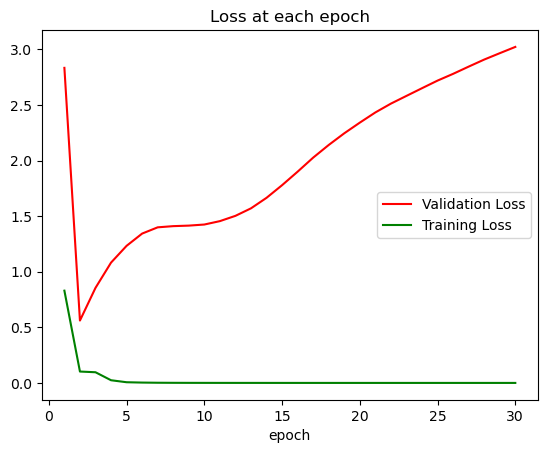

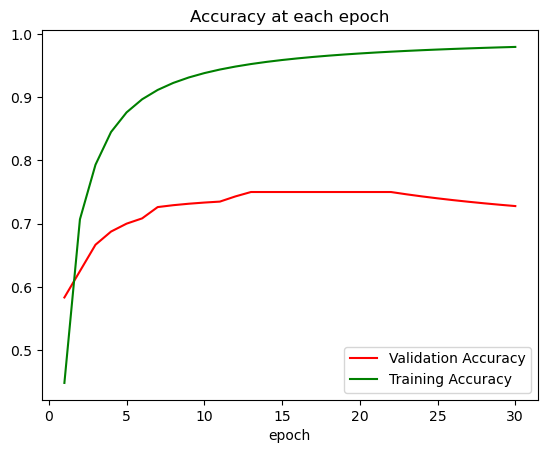

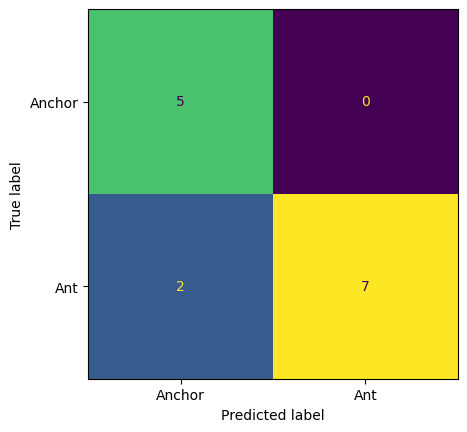

Test Accuracy 85.71% 


In [10]:
# Fine-tune a model to the dataset
# We use resnet18 as the model.
# Fine-tuning is like taking the general knowledge you've borrowed (the pre-trained model) and tailoring it to better suit your specific needs.
#  In fine-tuning, we allow some or all of the pre-trained model's weights to be updated during training on our new dataset.

model_ft = models.resnet18(pretrained=True)

# Do the things required for fine-tuning before training the model
# get the input features in the last layer of the resnet model
input_features = model_ft.fc.in_features

# Add an output layer to the resnet model such that output layer matches the classes (which is 2, Ant, Anchor) that we need
model_ft.fc = nn.Linear(input_features,2)

# set the loss function and criterion
epochs_ft = 35
LEARNING_RATE_ft = 0.001
criterion_ft = nn.CrossEntropyLoss()
optimizer_ft = torch.optim.Adam(model_ft.parameters(),lr=LEARNING_RATE_ft)

# Train the model
trained_model_ft = train_model(model_ft, criterion_ft, optimizer_ft, train_loader, val_loader, epochs)

# Test the model
tested_model = test_model(trained_model_ft,test_loader)

### Fine tuning with data augmentation

C:\Users\T460\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\T460\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Training Loss: 0.8638, Validation Loss: 0.5355
Epoch 2/30, Training Loss: 0.0868, Validation Loss: 0.9708
Epoch 3/30, Training Loss: 0.0062, Validation Loss: 1.5536
Epoch 4/30, Training Loss: 0.0022, Validation Loss: 2.2282
Epoch 5/30, Training Loss: 0.0007, Validation Loss: 2.6253
Epoch 6/30, Training Loss: 0.0005, Validation Loss: 2.8728
Epoch 7/30, Training Loss: 0.0004, Validation Loss: 2.9367
Epoch 8/30, Training Loss: 0.0002, Validation Loss: 2.9441
Epoch 9/30, Training Loss: 0.0002, Validation Loss: 2.9821
Epoch 10/30, Training Loss: 0.0001, Validation Loss: 3.0316
Epoch 11/30, Training Loss: 0.0001, Validation Loss: 3.1001
Epoch 12/30, Training Loss: 0.0001, Validation Loss: 3.1760
Epoch 13/30, Training Loss: 0.0001, Validation Loss: 3.2451
Epoch 14/30, Training Loss: 0.0001, Validation Loss: 3.3041
Epoch 15/30, Training Loss: 0.0001, Validation Loss: 3.3408
Epoch 16/30, Training Loss: 0.0001, Validation Loss: 3.3662
Epoch 17/30, Training Loss: 0.0000, Validation Lo

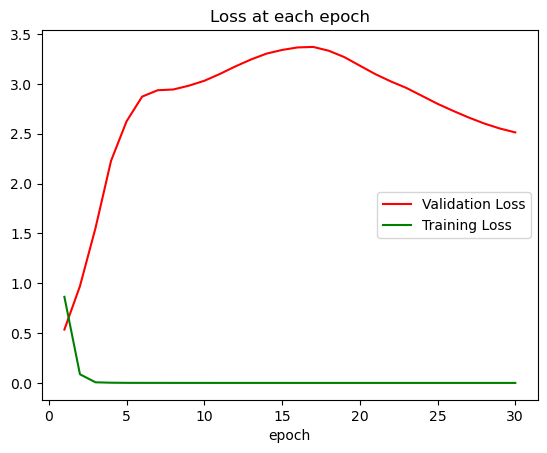

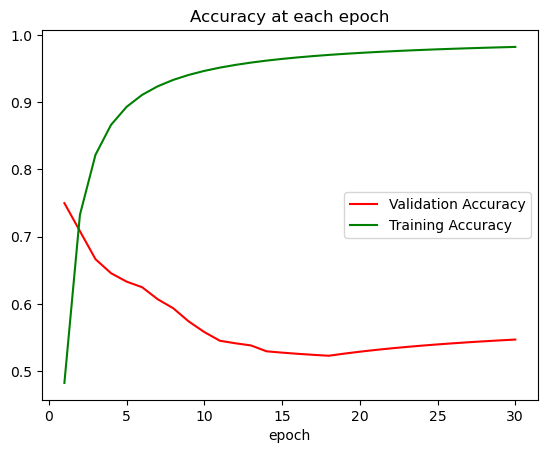

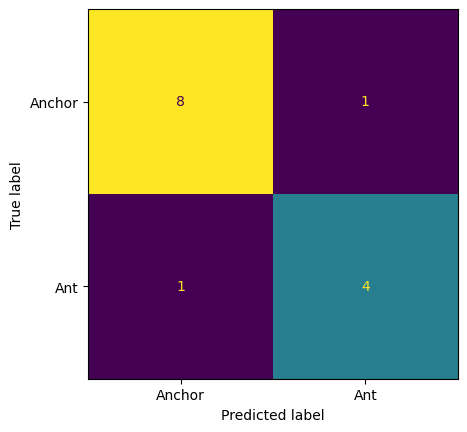

Test Accuracy 85.71% 


In [11]:
transform_train_ft = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=3,contrast=0.3,saturation=0.1,hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val_ft = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test_ft = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Read data
dataset = ImageFolder(root=DATA_DIR)
train_size = int((len(dataset) * 0.7))
val_size = int((len(dataset) * 0.15))
test_size = len(dataset) - train_size - val_size

# Split data into 70% training, 15% validation, 15% test
train_data, val_data, test_data = random_split(dataset, [train_size,val_size,test_size])

# Apply transformations to each subset of the dataset
train_data.dataset.transform = transform_train_ft
val_data.dataset.transform = transform_val_ft
test_data.dataset.transform = transform_test_ft

# Load data in the loader
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)

# We use resnet18 as the model.
model_ft_da = models.resnet18(pretrained=True)

# Do the things required for fine-tuning before training the model
# get the input features in the last layer of the resnet model
input_features_da = model_ft_da.fc.in_features

# Add an output layer to the resnet model such that output layer matches the classes (which is 2, Ant, Anchor) that we need
model_ft_da.fc = nn.Linear(input_features_da,2)

# Train the model
# set the loss function and criterion
epochs_ft_da = 30
LEARNING_RATE_ft_da = 0.001
criterion_ft_da = nn.CrossEntropyLoss()
optimizer_ft_da = torch.optim.Adam(model_ft_da.parameters(),lr=LEARNING_RATE_ft)

# Train the model
trained_model_ft_da = train_model(model_ft_da, criterion_ft_da, optimizer_ft_da, train_loader, val_loader, epochs_ft_da)

# Test the model
tested_model = test_model(trained_model_ft_da,test_loader)

## Task 4: Feature extraction
In task 4, you should use Resnet18 as a feature extractor. Similarly to task 3, some code has been provided. Remember to re-use as much code as you can. 

Once again, check the examination requirements so you don't forget to implement some required functionality.

C:\Users\T460\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
C:\Users\T460\anaconda3\envs\nnlm\lib\site-packages\torchvision\models\_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Training Loss: 0.9425, Validation Loss: 0.9419
Epoch 2/30, Training Loss: 0.8392, Validation Loss: 0.8863
Epoch 3/30, Training Loss: 0.7750, Validation Loss: 0.8642
Epoch 4/30, Training Loss: 0.7100, Validation Loss: 0.8442
Epoch 5/30, Training Loss: 0.6430, Validation Loss: 0.8309
Epoch 6/30, Training Loss: 0.5826, Validation Loss: 0.8207
Epoch 7/30, Training Loss: 0.5327, Validation Loss: 0.8125
Epoch 8/30, Training Loss: 0.4905, Validation Loss: 0.7932
Epoch 9/30, Training Loss: 0.4518, Validation Loss: 0.7716
Epoch 10/30, Training Loss: 0.4150, Validation Loss: 0.7552
Epoch 11/30, Training Loss: 0.3811, Validation Loss: 0.7419
Epoch 12/30, Training Loss: 0.3513, Validation Loss: 0.7393
Epoch 13/30, Training Loss: 0.3258, Validation Loss: 0.7430
Epoch 14/30, Training Loss: 0.3034, Validation Loss: 0.7470
Epoch 15/30, Training Loss: 0.2831, Validation Loss: 0.7534
Epoch 16/30, Training Loss: 0.2641, Validation Loss: 0.7620
Epoch 17/30, Training Loss: 0.2462, Validation Lo

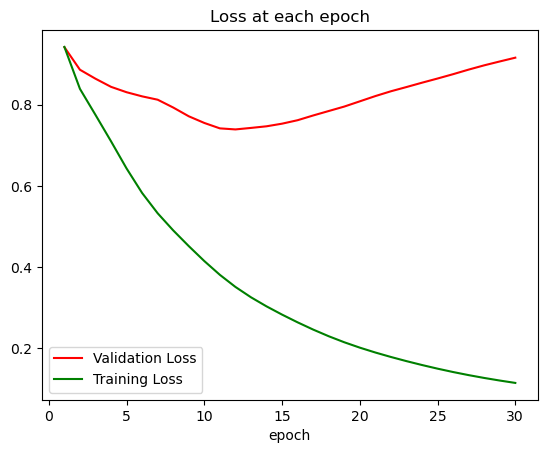

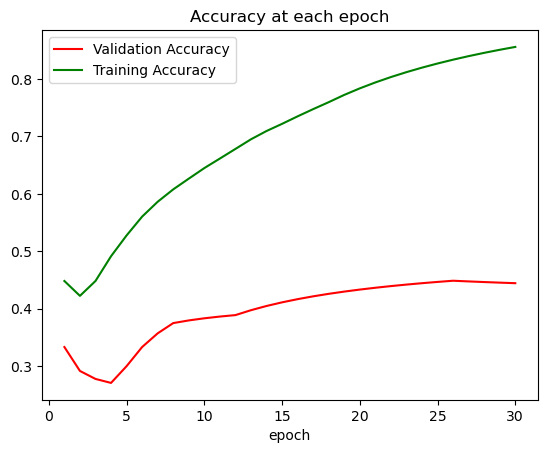

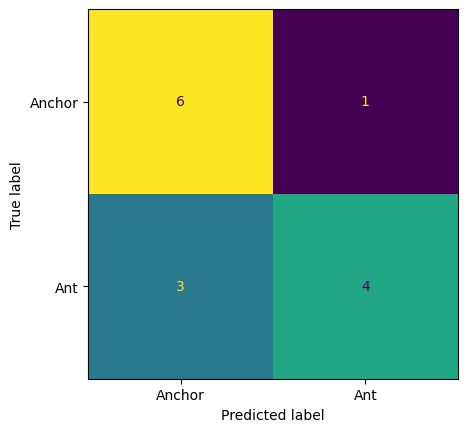

Test Accuracy 71.43% 


In [12]:
# Use a predefined model as a feature extractor
# These pre-trained models have already learned to detect basic patterns like edges, textures, and shapes. So, instead of starting from scratch, we can use these models to quickly identify these basic features in new images.
# When we perform feature extraction, we take the pre-trained model, remove its final classification layers (which were trained for the original task it was designed for), and then append new layers to tailor it to your specific task.

# We use resnet18 as the model.
model_fe = models.resnet18(pretrained=True)
input_features_fe = model_fe.fc.in_features
model_fe.fc = nn.Linear(input_features_fe,2)

# Do the things required for fine-tuning before training the model
# Weight of all the layers except the output layer must be frozen
for parameters in model_fe.parameters():
    parameters.requires_grad = False

#Unfreeze output layer, weights and bias of output layer needs to be updated per gradient
model_fe.fc.weight.requires_grad = True
model_fe.fc.bias.requires_grad = True

# set the hyperparameters
lr_fe = 0.001
criterion_fe = nn.CrossEntropyLoss()
optimizer_fe = torch.optim.Adam(model_fe.parameters(),lr=lr_fe)
epochs_fe = 30

# Train the model
trained_model_fe = train_model(model_fe, criterion_fe, optimizer_fe, train_loader, val_loader, epochs)

# Test the model
tested_model = test_model(trained_model_fe, test_loader)

/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet18_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet18_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


Epoch 1/30, Training Loss: 0.8299, Validation Loss: 1.2382
Epoch 2/30, Training Loss: 0.7087, Validation Loss: 1.1030
Epoch 3/30, Training Loss: 0.6820, Validation Loss: 1.0191
Epoch 4/30, Training Loss: 0.6537, Validation Loss: 0.9291
Epoch 5/30, Training Loss: 0.6056, Validation Loss: 0.8460
Epoch 6/30, Training Loss: 0.5510, Validation Loss: 0.7940
Epoch 7/30, Training Loss: 0.5034, Validation Loss: 0.7621
Epoch 8/30, Training Loss: 0.4682, Validation Loss: 0.7438
Epoch 9/30, Training Loss: 0.4419, Validation Loss: 0.7249
Epoch 10/30, Training Loss: 0.4178, Validation Loss: 0.6847
Epoch 11/30, Training Loss: 0.3919, Validation Loss: 0.6302
Epoch 12/30, Training Loss: 0.3644, Validation Loss: 0.5745
Epoch 13/30, Training Loss: 0.3381, Validation Loss: 0.5222
Epoch 14/30, Training Loss: 0.3153, Validation Loss: 0.4796
Epoch 15/30, Training Loss: 0.2967, Validation Loss: 0.4487
Epoch 16/30, Training Loss: 0.2815, Validation Loss: 0.4256
Epoch 17/30, Training Loss: 0.2682, Validation Lo

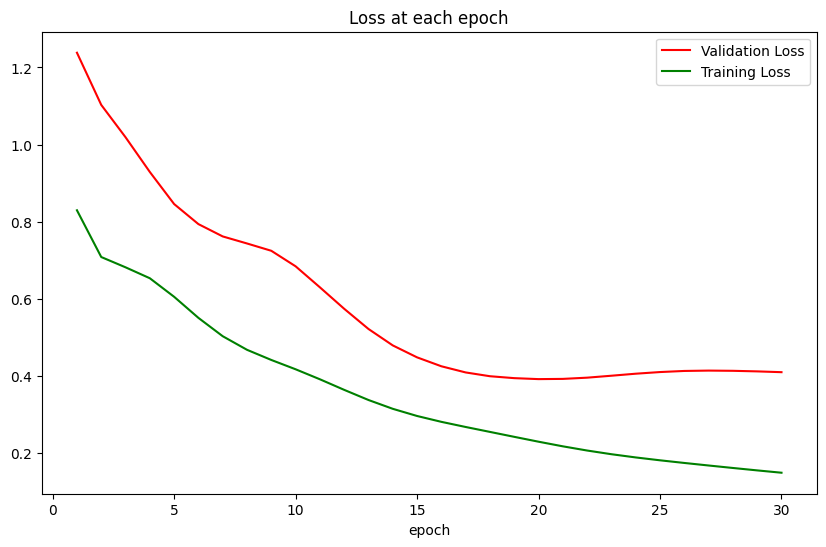

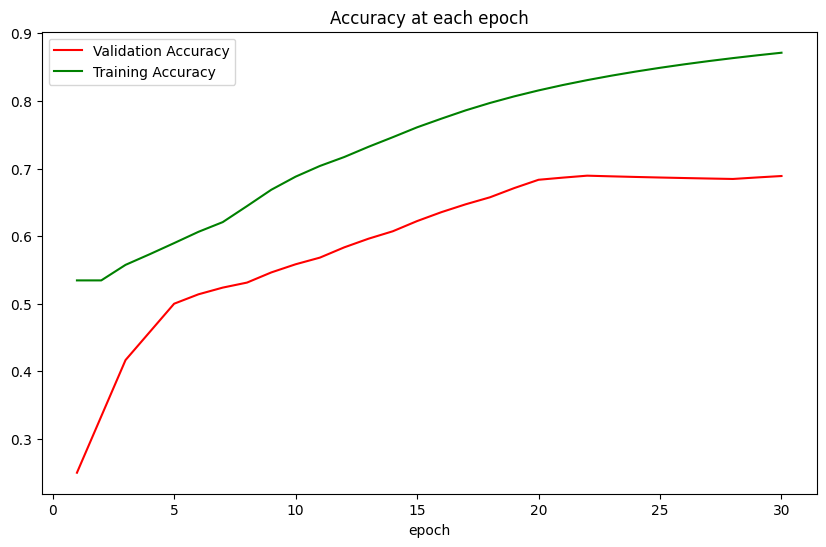

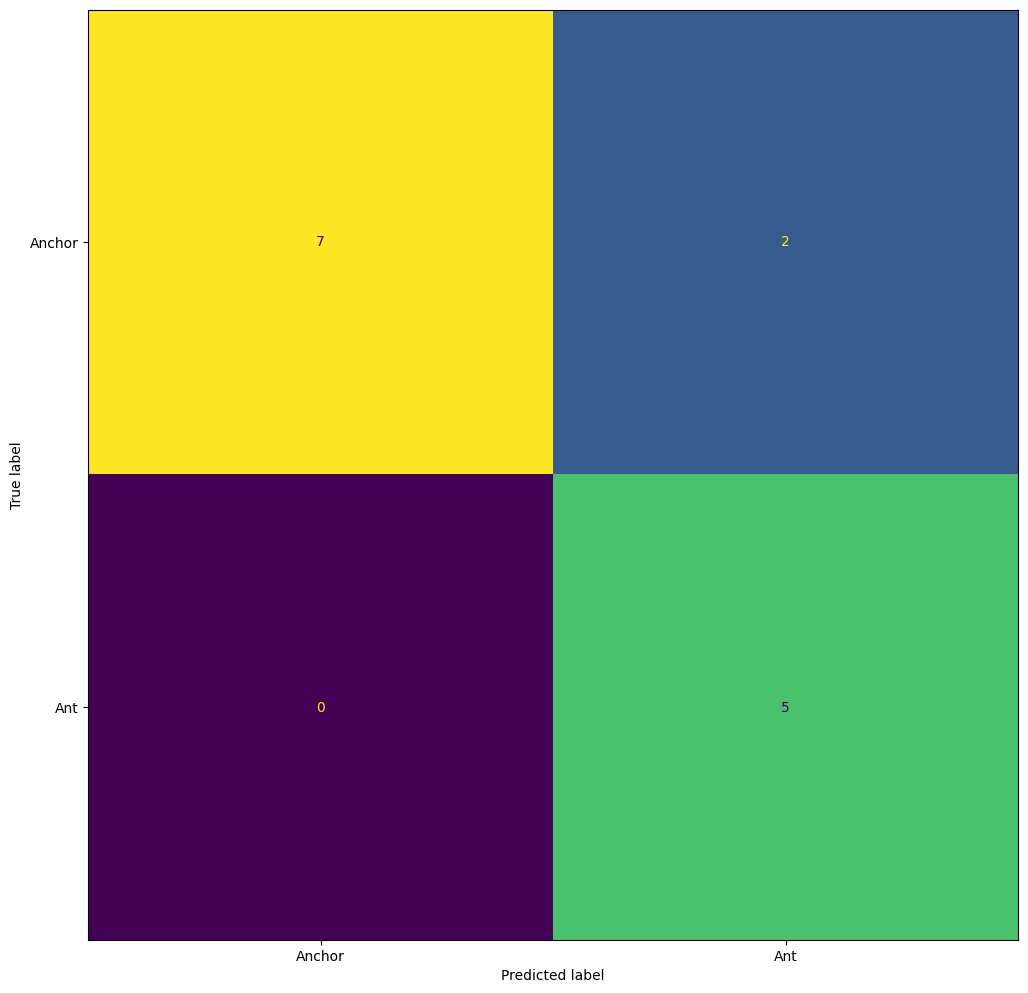

Test Accuracy 85.71% 


In [7]:
transform_train_ft = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.RandomHorizontalFlip(),
    transforms.RandomRotation(10),
    transforms.ColorJitter(brightness=3,contrast=0.3,saturation=0.1,hue=0.1),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_val_ft = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

transform_test_ft = transforms.Compose([
    transforms.Resize((64,64)),
    transforms.ToTensor(),
    transforms.Normalize(mean=[0.485, 0.456, 0.406], std=[0.229, 0.224, 0.225])
])

# Read data
dataset = ImageFolder(root=DATA_DIR)
train_size = int((len(dataset) * 0.7))
val_size = int((len(dataset) * 0.15))
test_size = len(dataset) - train_size - val_size

# Split data into 70% training, 15% validation, 15% test
train_data, val_data, test_data = random_split(dataset, [train_size,val_size,test_size])

# Apply transformations to each subset of the dataset
train_data.dataset.transform = transform_train_ft
val_data.dataset.transform = transform_val_ft
test_data.dataset.transform = transform_test_ft

# Load data in the loader
train_loader = DataLoader(train_data, batch_size=BATCH_SIZE, shuffle=True)
val_loader = DataLoader(val_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(test_data, batch_size=len(test_data), shuffle=True)

# Use a predefined model as a feature extractor

# We use resnet18 as the model.
model_fe = models.resnet18(pretrained=True)
input_features_fe = model_fe.fc.in_features
model_fe.fc = nn.Linear(input_features_fe,2)

# Do the things required for fine-tuning before training the model
# Weight of all the layers except the output layer must be frozen
for parameters in model_fe.parameters():
    parameters.requires_grad = False

#Unfreeze output layer, weights and bias of output layer needs to be updated per gradient
model_fe.fc.weight.requires_grad = True
model_fe.fc.bias.requires_grad = True

# set the hyperparameters
lr_fe = 0.001
criterion_fe = nn.CrossEntropyLoss()
optimizer_fe = torch.optim.Adam(model_fe.parameters(),lr=lr_fe)
epochs_fe = 30

# Train the model
trained_model_fe = train_model(model_fe, criterion_fe, optimizer_fe, train_loader, val_loader, epochs)

# Test the model
tested_model = test_model(trained_model_fe, test_loader)